# Домашнее задание №3. Сравнение оценок. Эффективные оценки
## Кисляков Данил 797

In [1]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
# Определим функцию для построения графиков
def plot(X, Y, legend, title, ylabel, ylim = 0, alpha = 0, xlabel = "Размер выборки $n$"):
    plt.figure(figsize = (10, 5))
    if alpha != 0:
        for i in range(np.shape(Y)[0]):
            plt.plot(X, Y[i], label = legend[i], alpha=alpha[i])
    else:
        for i in range(np.shape(Y)[0]):
            plt.plot(X, Y[i], label = legend[i])
    if legend[0]:
        plt.legend(fontsize = 12)
    plt.title(title, fontsize = 13)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    N = np.size(Y)
    if ylim > 0:
        plt.ylim(0, ylim)

### Задача 1
*(К теоретической задаче 1)* Сгенерируйте $M=100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

Начнём с инициализации массива исследуемых парметров, количества выборок и размера одной выборки

In [3]:
theta_arr = [1, np.pi, 5]
M = 100 # Количество выборок
N = 1000 # Размер одной выборки

Теперь для каждой из исследуемых оценок создадим словарь, в котором ключом будет параметр, а значением - двумерный массив значений оценки на срезках выборок. Сгенерируем выборку и по ней заполним словари оценок.

In [4]:
double_mean = dict()
unbiased_min = dict()
min_plus_max = dict()
unbiased_max = dict()
for theta in theta_arr:
    samples = sps.uniform(loc = 0, scale = theta).rvs(size = (M, N))
    double_mean[theta] = np.array([2 * np.mean(samples[:, :n], axis = 1) for n in range(1, N + 1)])
    unbiased_min[theta] = np.array([(n + 1) * np.amin(samples[:, :n], axis = 1) for n in range(1, N + 1)])
    min_plus_max[theta] = np.array([np.amin(samples[:, :n], axis = 1) + np.amax(samples[:, :n], axis = 1) 
                                    for n in range(1, N + 1)])
    unbiased_max[theta] = np.array([(n + 1) / n * np.amax(samples[:, :n], axis = 1) for n in range(1, N + 1)])

Для каждой оценки вычислим значение квадратичной функции потерь, усредённое по всем выборкам и построим графики зависимости от размера выборки. Заметим, что усреднённая по выборкам функция потерь в какой-то мере соответствует функции риска. Если быть точнее - с ростом количества выборок, для которых считается усреднённая функция потерь, эта функция сходится к функции риска почти наверное (следует из УЗБЧ, т.к. считаем все выборки независимыми между собой). В рамках данной задачи будем считать, что усреднённая функция потерь просто с некоторой степенью точности приближает функцию риска, которая в свою очередь с ростом размера выборки должна сходится к нулю по вероятности, если оценка состоятельна и почти наверное, если оценка сильно состоятельна.

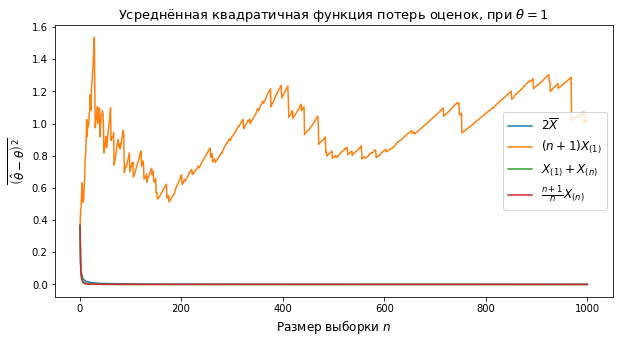

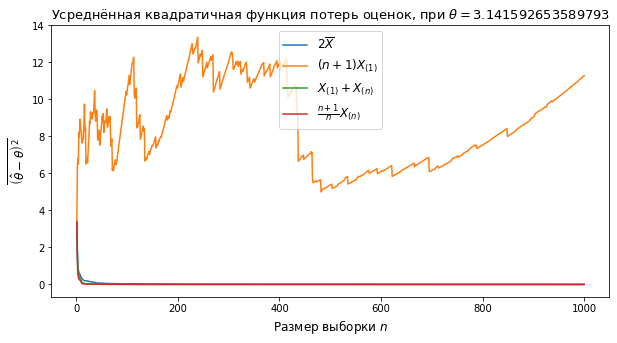

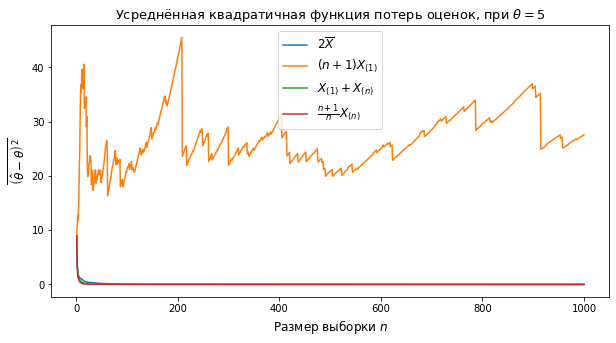

In [5]:
legend = [r'$2\overline{X}$', r'$(n+1)X_{(1)}$', r'$X_{(1)} + X_{(n)}$', r'$\frac{n+1}{n}X_{(n)}$']
title = r'Усреднённая квадратичная функция потерь оценок, при $\theta = {}$'
ylabel = r'$\overline{\left(\hat{\theta} - \theta\right)^2}$'
loss = dict()
for theta in theta_arr:
    loss[theta] = np.empty((4, N))
    t_loss = loss[theta] 
    t_loss[0] = np.mean((double_mean[theta] - theta)**2, axis = 1)
    t_loss[1] = np.mean((unbiased_min[theta] - theta)**2, axis = 1)
    t_loss[2] = np.mean((min_plus_max[theta] - theta)**2, axis = 1)
    t_loss[3] = np.mean((unbiased_max[theta] - theta)**2, axis = 1)
    plot(range(1, N + 1), t_loss, legend, title.format(theta), ylabel)

По графикам видно, что оценка $(n+1)X_{(1)}$ сильно отличается от остальных - её приближенная функция риска не уменьшается с ростом размера выборки. Очевидно, что она не лучше остальных рассматриваемых оценок в смысле равномерного подхода. Также по приближенной функции риска этой оценки можно сделать вывод, что она не является даже состоятельной, так как не сходится к нулю по вероятности. Исключим эту оценку и построим графики ещё раз в другом масштабе.

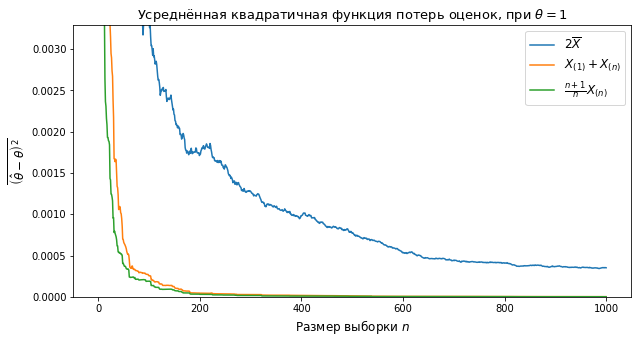

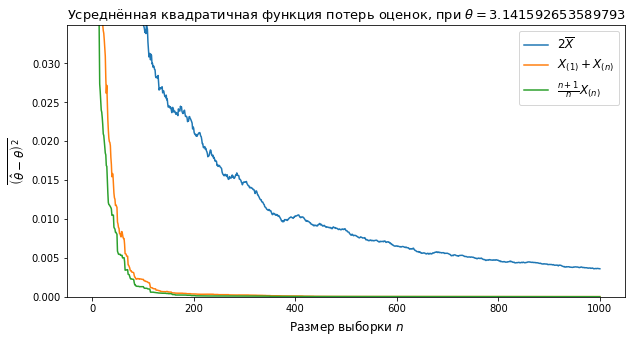

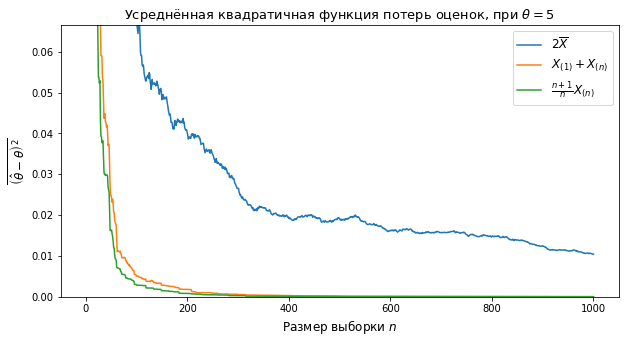

In [6]:
for theta in theta_arr:
    t_loss = np.delete(loss[theta], 1, 0)
    ylim = np.amax(t_loss[:,N // 10:])
    plot(range(1, N + 1), t_loss, np.delete(legend, 1, 0), title.format(theta), ylabel, ylim)

По этим графикам видно, что оценка $2\overline{X}$ не лучше чем две другие оценки. Исключим её, чтобы сравнить оставшиеся оценки, и, возможно, понять какая из них является наилучшей (из исследуемых) в равномерном подходе. (Масштаб увеличен, чтобы лучше сравнить оценки при больших значениях $n$)

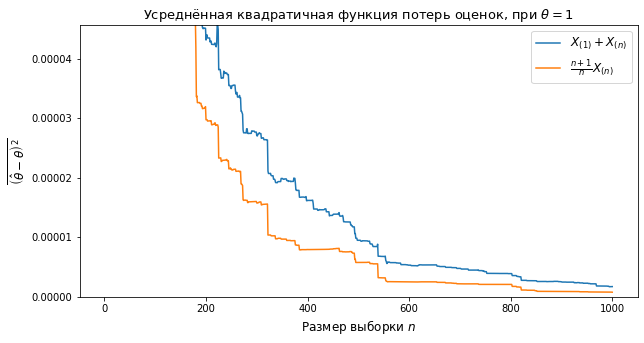

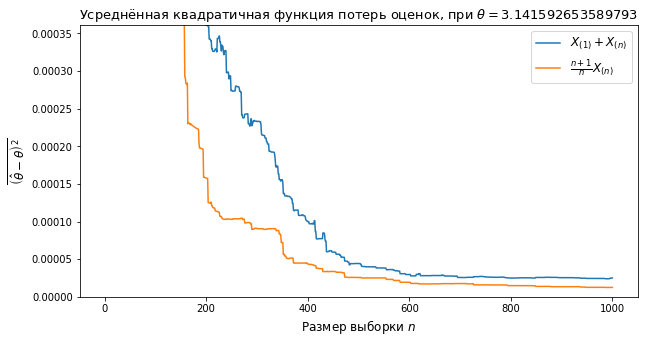

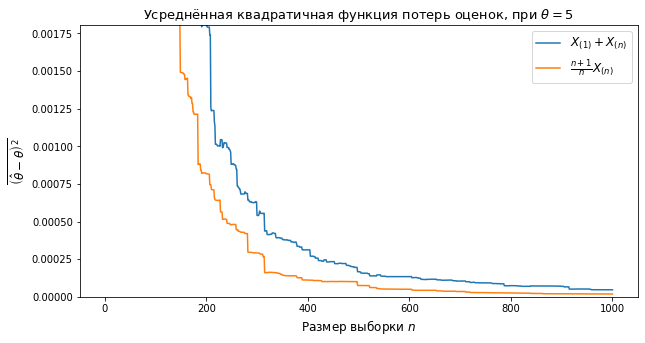

In [7]:
for theta in theta_arr:
    t_loss = np.delete(loss[theta], np.s_[:2], 0)
    ylim = np.amax(t_loss[:,N // 5:])
    plot(range(1, N + 1), t_loss, np.delete(legend, np.s_[:2], 0), title.format(theta), ylabel, ylim)

#### Вывод:
Судя по представленным выше графикам, оценка $\frac{n+1}{n}X_{(n)}$ является наилучшей из четырёх исследуемых в равномерном подходе с квадратичной функцией потерь, по крайней мере, для исследуемых значений параметра. Чтобы убедится в этом, стоит провести эксперимент для большего количества разных значений параметра, а также повторить его для разных выборок. Однако в рамки задачи более детальное исследование не входит. Отдельно отметим, что обе оценки, сравниваемые на последней серии графиков являются сильно состоятельными и несмещёнными, но по причинам, которые автор не может объяснить известной ему теорией, оценка несмещённым максимумом $\left(\frac{n+1}{n}X_{(n)}\right)$ оказывается лучше суммы максимума и минимума $(X_{(1)} + X_{(n)})$.

### Задача 2
_(К теоретическим задачам 3, 4, 5)_ В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\widehat{\theta} (X)$ параметра $\theta$ выполнено неравенство Рао-Крамера
$$\mathsf{D}_{\theta} \widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$ 
Cгенерируйте выборку $X_1, ..., X_N$, $N=1000$, из распределений в теоретических задачах (биномиальное распределение, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной оценкой $-$ в задаче 3 возьмите $\frac{X_1}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану. Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике кривую зависимости $\frac {1} {I_X (\theta)}$ от $n.$

Сначала проведём эксперименты для каждого распределения, а потом в конце сделаем общий вывод. Общим для всех экспериментов будут размер выборки и количество бутстрепных выборок, поэтому, сначала зафиксируем эти параметры.

In [8]:
N = 1000 # Размер выборки
M = 500 # Количество бутстрепных выборок

#### 1. Биномиальное распределение $Bin(m = 50, p)$
Выберем второй параметр для биномиального распределения из $R[0, 1].$ Сгенерируем выборку, и найдём на ней значения эффективной и несмещённой оценок для каждого $n \leqslant N.$ На семинарах доказывалось (с помощью критерия эффективности Неймана-Фишера) что эффективной оценкой для биномиального распределения является $\hat{p}_\text{eff} = \frac{\overline{X}}{m}.$ В качестве несмещённой оценки предалагается взять $\hat{p} = \frac{X_1}{m}$

In [9]:
m = 50
p = sps.uniform().rvs()
X = sps.binom(m, p).rvs(N)
p_eff = np.array([np.mean(X[:n]) / m for n in range(1, N + 1)])
# Предложенная несмещённая оценка игнорирует все элементы выборки кроме первого
# Поэтому для каждой срезки оценка будет одинаковой
p_unbiased = X[0] / m

Теперь посчитаем бутстрепную оценку дисперсии параметрическим методом для обеих оценок, для каждого $n \leqslant N.$

In [10]:
bin_var_eff = []
bin_var_unb = []
for n in range(1, N + 1):
    X_bootstrap = sps.binom(m, p_eff[n - 1]).rvs((M, n))
    bootstrap_p = np.mean(X_bootstrap, axis = 1) / m
    bin_var_eff.append(np.var(bootstrap_p))
    X_bootstrap = sps.binom(m, p_unbiased).rvs((M, n))
    bootstrap_p = X_bootstrap[:,0] / m
    bin_var_unb.append(np.var(bootstrap_p))

Теперь построим графики зависимости бутстрепых оценок дисперсий эффективной оценки $\hat{p}_\text{eff} = \frac{\overline{X}}{m},$ оценки из класса несмещённых $\hat{p} = \frac{X_1}{m}$ и теоретической оценки снизу дисперсии произвольной несмещённой оценки $\frac{1}{I_X(p)} = \frac{p(1- p)}{mn}$ (последнее выводилось на семинаре) от размера выборки $n.$ Заранее заметим, что в силу определения эффективной оценки (на ней в неравенстве Рао-Крамера достигается равенство) первая и третья зависимости должны примерно совпадать, а вторая скорее всего будет больше остальных.

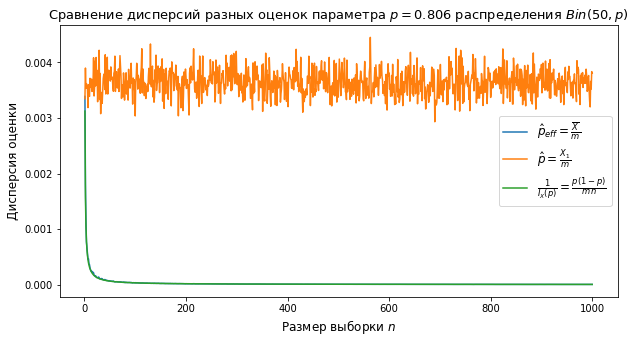

In [11]:
# Считаем нижнюю оценку дисперсии из неравенства Рао-Крамера
bin_low_est = p * (1 - p) / (m * np.arange(1, N + 1))
title = r'Сравнение дисперсий разных оценок параметра $p = {}$ распределения $Bin({}, p)$'.format(round(p, 3), m)
leg_eff = r'$\hat{p}_{eff} = \frac{\overline{X}}{m}$'
leg_unb = r'$\hat{p} = \frac{X_1}{m}$'
leg_est = r'$\frac{1}{I_X(p)} = \frac{p(1- p)}{mn}$'
plot(range(1, N + 1), [bin_var_eff, bin_var_unb, bin_low_est], [leg_eff, leg_unb, leg_est],
     title, "Дисперсия оценки")

По графику очевидно, что предположение об обычной (не эффективной) несмещённой оценке $\hat{p}$ было верным $-$ её дисперсия на порядки больше дисперсии эффективной оценки и её теоретической оценки. Построим график ещё раз, исключив оценку $\hat{p},$ чтобы сравнить дисперсию эффективной оценки с теоретической оценкой снизу из неравенства Рао-Крамера.

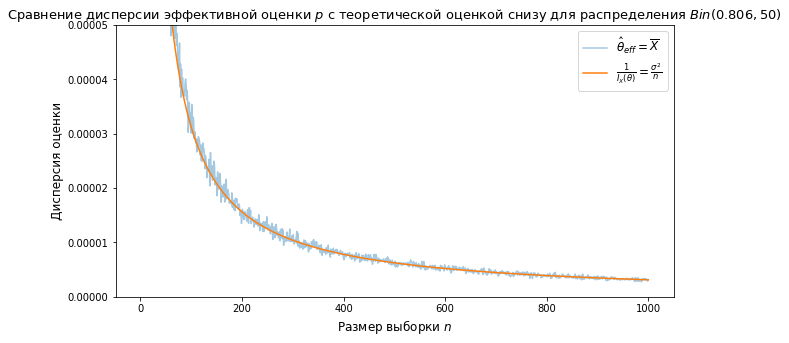

In [25]:
title = "Сравнение дисперсии эффективной оценки $p$ с теоретической \
оценкой снизу для распределения $Bin({}, {})$".format(round(p, 3), m)
plot(range(1, N + 1), [bin_var_eff, bin_low_est], [leg_eff, leg_est], title, "Дисперсия оценки",
     ylim = 5e-5, alpha = [0.4, 1])

Напомним, что выводы будут сделаны после построения аналогичных графиков для всех указанных в условии распределений

#### 2. Экспоненциальное распределение $Exp(\theta)$
Выберем параметр экспоненциального распределения из $R[0, 1].$ Сгенерируем выборку, и найдём на ней значения эффективной и несмещённой оценок для каждого $n \leqslant N.$ На семинарах доказывалось (с помощью критерия эффективности Неймана-Фишера) что эффективной оценкой для $\frac{1}{\theta},$ где $\theta$ $-$ параметр экспоненциального распределения является $\hat{\theta}_\text{eff} = \overline{X}$ (с помощью того же критерия можно доказать, что для самого парметра $\theta$ эффективной оценки не существует, что было сделано на семинаре). В качестве несмещённой оценки этой функции параметра предлагается взять $\hat{\theta} = \frac{n - 1}{n\overline{X}}.$ Однако, выкладки показывают, что эта статистика является несмещённой оценкой $\theta,$ но не $\frac{1}{\theta}.$ Так как целью эксперимента является сравнение именно эффективной оценки по аналогии с предыдущим пунктом в качестве несмещённой оценки возьмём $\hat\theta = X_1.$ 

In [13]:
theta = sps.uniform().rvs()
X = sps.expon(scale = 1 / theta).rvs(N)
theta_eff = np.array([np.mean(X[:n]) for n in range(1, N + 1)])
# Предложенная несмещённая оценка игнорирует все элементы выборки кроме первого
# Поэтому для каждой срезки оценка будет одинаковой
theta_unbiased = X[0]

Теперь посчитаем бутстрепную оценку дисперсии параметрическим методом для обеих оценок, для каждого $n \leqslant N.$

In [14]:
exp_var_eff = []
exp_var_unb = []
for n in range(1, N + 1):
    X_bootstrap = sps.expon(scale = 1 / theta_eff[n - 1]).rvs((M, n))
    bootstrap_theta = np.mean(X_bootstrap, axis = 1)
    exp_var_eff.append(np.var(bootstrap_theta))
    X_bootstrap = sps.expon(scale = 1 / theta_unbiased).rvs((M, n))
    bootstrap_theta = X_bootstrap[:,0]
    exp_var_unb.append(np.var(bootstrap_theta))

Теперь построим графики зависимости бутстрепых оценок дисперсий эффективной оценки $\hat\theta_\text{eff} = \overline{X},$ оценки из класса несмещённых $\hat\theta = X_1$ и теоретической оценки снизу дисперсии произвольной несмещённой оценки $\frac{(\tau'(\theta))^2}{I_X(\theta)} = \frac{1}{\theta^2n}$ (последнее выводилось на семинаре и следует из неравенства Крамера-Рао, $\tau(x) = \frac{1}{x}$) от размера выборки $n.$ Теоретически, графики должны соотносится друг с другом также, как и в предыдущем пункте.

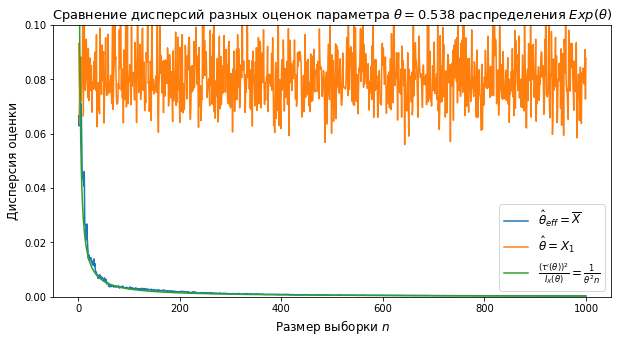

In [15]:
# Считаем нижнюю оценку дисперсии из неравенства Рао-Крамера
exp_low_est = theta**2 / (np.arange(1, N + 1))
title = r'Сравнение дисперсий разных оценок параметра $\theta = {}$ распределения $Exp(\theta)$'.format(round(theta, 3))
leg_eff = r'$\hat\theta_{eff} = \overline{X}$'
leg_unb = r'$\hat\theta = X_1$'
leg_est = r"$\frac{(\tau'(\theta))^2}{I_X(\theta)} = \frac{1}{\theta^2n}$"
plot(range(1, N + 1), [exp_var_eff, exp_var_unb, exp_low_est], [leg_eff, leg_unb, leg_est],
     title, "Дисперсия оценки", ylim = 1e-1)

Получили график, аналогичный предыдущему пункту: дисперсия обычной несмещённой оценки на порядки больше дисперсии эффективной оценки и её теоретической оценки. Построим график ещё раз, исключив оценку $\hat{\theta},$ чтобы сравнить дисперсию эффективной оценки с теоретической оценкой снизу из неравенства Рао-Крамера.

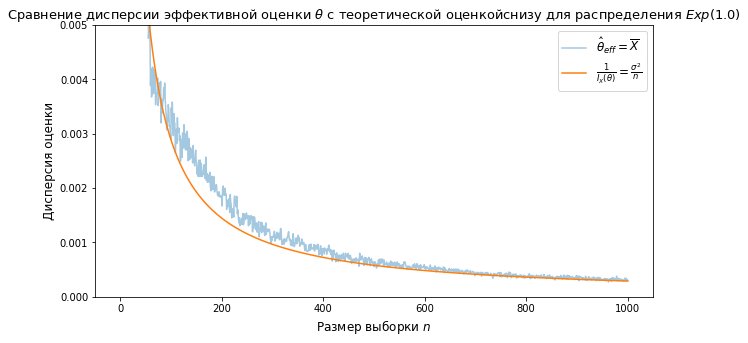

In [26]:
title = r"Сравнение дисперсии эффективной оценки $\theta$ с теоретической оценкой"
title += "снизу для распределения $Exp({})$".format(round(theta, 3))
plot(range(1, N + 1), [exp_var_eff, exp_low_est], [leg_eff, leg_est], title, "Дисперсия оценки",
     ylim = 5e-3, alpha = [0.4, 1])

#### 3. Нормальное распределение $\mathcal{N}(\theta, 2.1)$
Выберем первый параметр нормального распределения из $R[0, 1].$ Сгенерируем выборку, и найдём на ней значения эффективной и несмещённой оценок для каждого $n \leqslant N.$ На семинарах доказывалось (с помощью критерия эффективности Неймана-Фишера) что эффективной оценкой для $\theta$ является $\hat{\theta}_\text{eff} = \overline{X}$. В качестве несмещённой оценки этой функции параметра предлагается взять $\hat{\theta} = \hat\mu$ - выборочная медаина (несмещённость этой оценки оставим на совести составителей условия) 

In [17]:
sq_sigma = 2.1
theta = sps.uniform().rvs()
X = sps.norm(loc = theta, scale = np.sqrt(sq_sigma)).rvs(N)
theta_eff = np.array([np.mean(X[:n]) for n in range(1, N + 1)])
theta_unbiased = np.array([np.median(X[:n]) for n in range(1, N + 1)])

Теперь посчитаем бутстрепную оценку дисперсии параметрическим методом для обеих оценок, для каждого $n \leqslant N.$

In [18]:
norm_var_eff = []
norm_var_unb = []
for n in range(1, N + 1):
    X_bootstrap = sps.norm(loc = theta_eff[n - 1], scale = np.sqrt(sq_sigma)).rvs((M, n))
    bootstrap_theta = np.mean(X_bootstrap, axis = 1)
    norm_var_eff.append(np.var(bootstrap_theta))
    X_bootstrap = sps.norm(loc = theta_eff[n - 1], scale = np.sqrt(sq_sigma)).rvs((M, n))
    bootstrap_theta = np.median(X_bootstrap, axis = 1)
    norm_var_unb.append(np.var(bootstrap_theta))

Теперь построим графики зависимости бутстрепых оценок дисперсий эффективной оценки $\hat\theta_\text{eff} = \overline{X},$ оценки из класса несмещённых $\hat\theta = \hat\mu$ и теоретической оценки снизу дисперсии произвольной несмещённой оценки $\frac{1}{I_X(\theta)} = \frac{1}{\sigma^2}$ (последнее выводилось на семинаре и следует из неравенства Крамера-Рао) от размера выборки $n.$ Теоретически, графики должны соотносится друг с другом также, как и в предыдущем пункте.

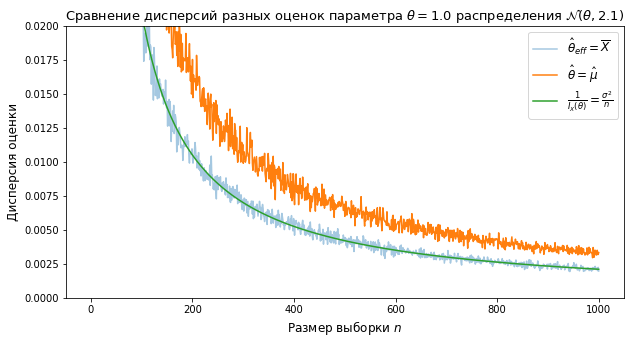

In [24]:
# Считаем нижнюю оценку дисперсии из неравенства Рао-Крамера
norm_low_est = sq_sigma / np.arange(1, N + 1)
title = r'Сравнение дисперсий разных оценок параметра $\theta = {}$'.format(round(theta, 3))
title += r' распределения $\mathcal{N}(\theta, 2.1)$'
leg_eff = r'$\hat\theta_{eff} = \overline{X}$'
leg_unb = r'$\hat\theta = \hat\mu$'
leg_est = r"$\frac{1}{I_X(\theta)} = \frac{\sigma^2}{n}$"
plot(range(1, N + 1), [norm_var_eff, norm_var_unb, norm_low_est], [leg_eff, leg_unb, leg_est],
     title, "Дисперсия оценки", ylim = 2e-2, alpha = [0.4, 1, 1])

Заметим, что в отличие от предыдущих двух распределений, выбранная нами неэффективная оценка $\hat\theta$ несильно хуже (в смысле дисперсии) чем эффективная оценка. Совпадение дисперсии эффективной оценки с теоретической оценкой очевидно.

#### Вывод:
Из построенных графиков сравнения дисперсий эффективной и обычных несмещённых оценок видно, что эффективная оценка, в соответствии с определением, имеет минимально возможную дисперсию, совпадающую с оценкой снизу из неравенства Крамера-Рао, что хорошо видно в сравнении с дисперсией несмещённых оценок. Таким образом, мы удостоверились в истинности вышеуказанного неравенства на эксперименте.

### Задача 3
Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0, 1]$ с шагом $0.01$ постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

Вспомним неравенство Рао-Крамера, которое справедливо для некоторой несмещённой оценки параметра $\theta$ при выполненных условиях регулярности 1-4:
$$
    Var_\theta \hat\theta(X) \geqslant \frac{1}{I_X(\theta)}\text{, где } 
    I_X(\theta) = E_\theta\left(\frac{\partial}{\partial\theta}\ln p_\theta(X)\right)^2.
$$
Соответственно, необходимо сначала найти информацию Фишера $I_X(\theta)$ для распределения $Bern(\theta):$
$$
    p_\theta(X) = \theta^{\sum X_i}(1 - \theta)^{n - \sum X_i} \\
    \ln p_\theta(X) = \ln\theta\sum X_i + \ln(1-\theta)\left(n - \sum X_i\right) \\
    \frac{\partial}{\partial\theta}\ln p_\theta(X) = \frac{\sum X_i}{\theta} - \frac{n - \sum X_i}{1 - \theta} = 
    \frac{\sum X_i - \theta\sum X_i - n\theta + \theta\sum X_i}{\theta(1 - \theta)} =
    \frac{\sum X_i - n\theta}{\theta(1 - \theta)} \\
    I_X(\theta) = E_\theta\left(\frac{\partial}{\partial\theta}\ln p_\theta(X)\right)^2 = 
    \frac{1}{\theta^2(1-\theta)^2}E_\theta\left(\left(\sum X_i\right)^2 - 2n\theta\sum X_i + n^2\theta^2\right) =
    \frac{E_\theta\left(\sum X_i\right)^2 - 2n\theta E_\theta\left(\sum X_i\right) + n^2\theta^2}{\theta^2(1-\theta)^2} = \\
    = \frac{n\theta + n(n - 1)\theta^2 - 2n^2\theta^2 + n^2\theta^2}{\theta^2(1-\theta)^2} = 
    \frac{n\theta(1 - \theta)}{\theta^2(1-\theta)^2} = \frac{n}{\theta(1-\theta)}.
$$
Отсюда:
$$
    Var_\theta \hat\theta(X) \geqslant \frac{\theta(1-\theta)}{n}
$$

Создадим сетку параметра $\theta.$ Также зафиксируем размер выборки, так как получившаяся нижняя оценка зависит от него. Заметим, что чем больше размер выборки, тем меньше оценка снизу для дисперсии

In [20]:
theta_arr = np.linspace(0, 1.0, int(1.0 / 0.01) + 1)
N = 1000

Построим график зависимости нижней оценки дисперсии несмещённой оценки $\theta$ от значения параметра.

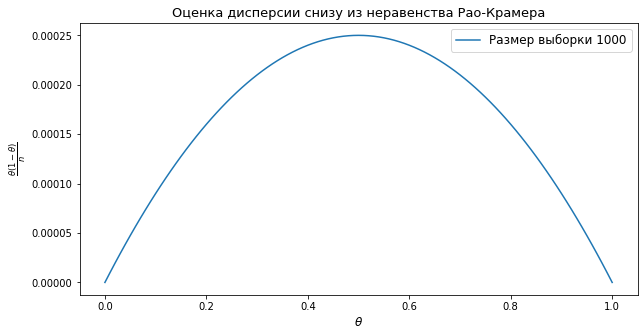

In [21]:
plot(theta_arr, [theta_arr * (1- theta_arr) / N], ["Размер выборки {}".format(N)],
     "Оценка дисперсии снизу из неравенства Рао-Крамера",
     r'$\frac{\theta(1-\theta)}{n}$', xlabel = r'$\theta$')

По графику можно сделать вывод примерно следующего содержания: чем ближе параметр $\theta$ к середине отрезка $[0, 1],$ тем больше будет дисперсия несмещённой оценки этого параметра. Иначе говоря, чем ближе значение параметра к $0$ или $1,$ тем точнее будет эффективная несмещённая оценка.

Чтобы проверить этот вывод, рассмотрим зависимость дисперсии эффективной оценки от значения параметра. Дисперсию будем искать с помощью параметрического бутстрепа. В качестве оценки возьмем $\overline{X}.$ Несмещённость и эффективность оценки доказывались на семинарах.

In [22]:
N = 1000 # Размер одной выборки
M = 500 # Количество бутстрепных выборок
bt_variance = np.empty(np.size(theta_arr))
for i in range(np.size(theta_arr)):
    theta = theta_arr[i]
    X = sps.bernoulli(theta).rvs(N)
    estimate = np.mean(X)
    X_bt = sps.bernoulli(estimate).rvs((M, N))
    bt_estim = np.mean(X_bt, axis = 1)
    bt_variance[i] = np.var(bt_estim)

Построим график зависимости бутстрепных оценок дисперсии эффективной оценки параметра в зависимости от $\theta.$

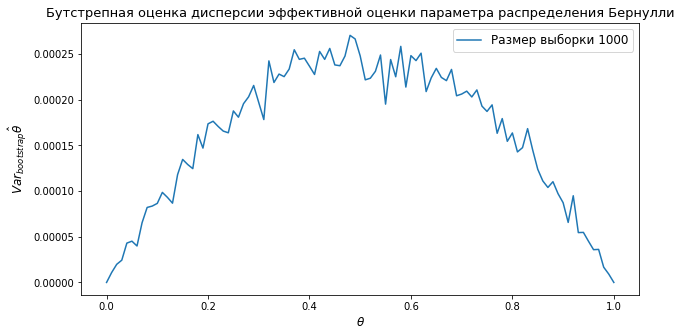

In [23]:
plot(theta_arr, [bt_variance], ["Размер выборки {}".format(N)], 
     "Бутстрепная оценка дисперсии эффективной оценки параметра распределения Бернулли",
     r'$Var_{bootstrap}\hat\theta$', xlabel = r'$\theta$')

#### Вывод:
Последний график позволяет нам заключить, что зависимость дисперсии эффективной оценки от параметра совпадает с теоретической, полученной из неравенства Рао-Крамера (по крайней мере, для распределения Бернулли), т.к. для эффективной оценки неравенство становится равенством. Сильная зашумленность графика связана с относительно небольшим количеством бутстрепных выборок. Автор предполагает, что если это количество увеличить то кривая станет более "плавной". Однако общий тренд и так хорошо заметен и совпадает с первым графиком этой задачи. Также отметим, что отличие этой задачи от второй состоит в том, что здесь исследуется зависимость дисперсии оценки от параметра $\theta$, в то время как во второй задаче мы рассматривали зависимость от размера выборки $n.$